# Data Cleaning


In [4]:
import pandas as pd 
import numpy as np 
pd.options.mode.chained_assignment = None
#SettingWithCopyWarning
Spam_Identifier_DF = pd.read_csv(r"spam_datasets.csv",encoding="ISO-8859-1") 
Spam_Identifier_DF.head(10)
#DATA CLEANING(remove all NaN values and some more )
#Spam_Identifier_DF.shape

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
Spam_Identifier_DF.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace = True) 
#If there is inplace = True, the code will not retur anything so we cannot store in different variable Spam_Identifier_DF#df.sample()
#Changing the Column title to our understanding

Spam_Identifier_DF.rename(columns = {"v1" : "Spam/Ham", "v2" : "Messages"}, inplace = True)
Spam_Identifier_DF.head(10)

,Spam/Ham,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
from sklearn.preprocessing import LabelEncoder #skleanr.preprocessing
obj = LabelEncoder()
Spam_Identifier_DF["Spam/Ham"] = obj.fit_transform(Spam_Identifier_DF["Spam/Ham"])
Spam_Identifier_DF

,Spam/Ham,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [4]:
#Checking the null value
Spam_Identifier_DF.isnull().sum()

Spam/Ham    0
Messages    0
dtype: int64

In [5]:
#Checking no of duplicate values 
#Spam_Identifier_DF["Messages"][Spam_Identifier_DF.duplicated()]
Spam_Identifier_DF.duplicated().sum()

403

In [6]:
#Removing duplicate values...
Spam_Identifier_DF = Spam_Identifier_DF.drop_duplicates(keep = "first")
Spam_Identifier_DF

,Spam/Ham,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
Spam_Identifier_DF["Spam/Ham"].value_counts()

Spam/Ham
0    4516
1     653
Name: count, dtype: int64

# EDA(Exploratory Data Analysis)


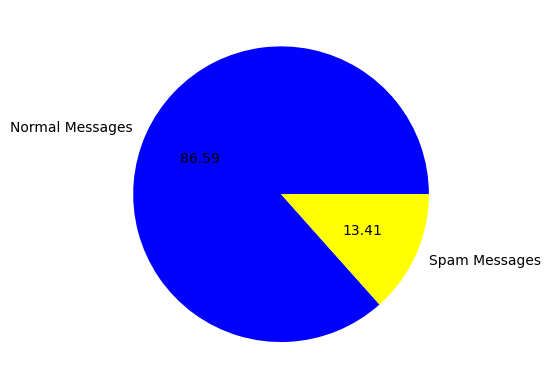

In [21]:
#Import matplotlib.pyplot for Data Visualization
import matplotlib.pyplot as plt
#print(Spam_Identifier_DF["Spam/Ham"].values)
plt.pie(Spam_Identifier_DF["Spam/Ham"].value_counts(), labels = ["Normal Messages","Spam Messages"], autopct = "%0.2f", colors = ["blue", "yellow"])
plt.show()

In [9]:
import nltk   #Natural Language Tool Kit
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GOODLUCK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
#adding a new column with number of characters each contains..
Spam_Identifier_DF["Character_Count"] = Spam_Identifier_DF["Messages"].apply(len)
Spam_Identifier_DF.head(10)

,Spam/Ham,Messages,Character_Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [11]:
#Find the number of words in each message 
'''def count_o(message):
    return message.count('o')'''
Spam_Identifier_DF["Messages Words"] = Spam_Identifier_DF["Messages"].apply(lambda x : len(nltk.word_tokenize(x)))
Spam_Identifier_DF.head()

,Spam/Ham,Messages,Character_Count,Messages Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [12]:
#Find the number of sentences in a Message
Spam_Identifier_DF["Messages Sentences"] = Spam_Identifier_DF["Messages"].apply(lambda x : len(nltk.sent_tokenize(x)))
Spam_Identifier_DF.head()

,Spam/Ham,Messages,Character_Count,Messages Words,Messages Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [13]:
Spam_Identifier_DF[["Character_Count","Messages Words","Messages Sentences"]].describe()

,Character_Count,Messages Words,Messages Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [14]:
Spam_Identifier_DF[Spam_Identifier_DF["Spam/Ham"] == 0][["Character_Count","Messages Words","Messages Sentences"]].describe()

,Character_Count,Messages Words,Messages Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [15]:
Spam_Identifier_DF[Spam_Identifier_DF["Spam/Ham"] == 1][["Character_Count","Messages Words","Messages Sentences"]].describe()

,Character_Count,Messages Words,Messages Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='Character_Count', ylabel='Count'>

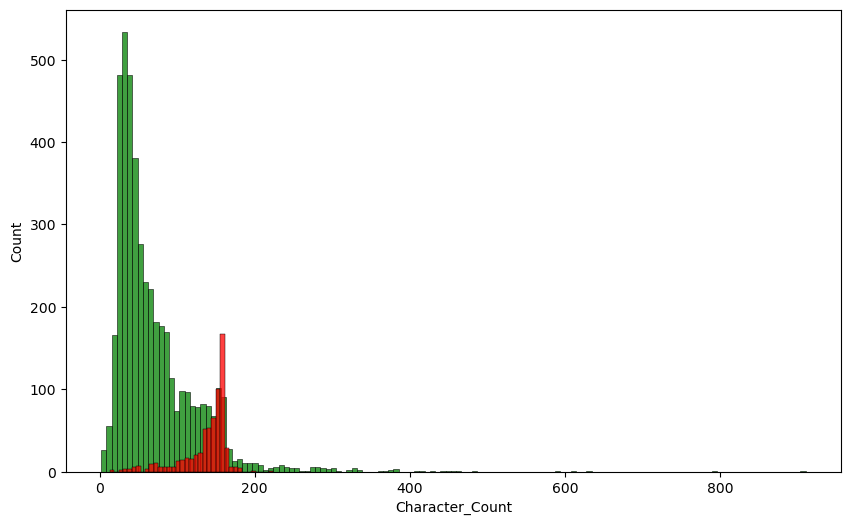

In [16]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(Spam_Identifier_DF[Spam_Identifier_DF["Spam/Ham"] == 0]["Character_Count"], color = "green" )
sns.histplot(Spam_Identifier_DF[Spam_Identifier_DF["Spam/Ham"] == 1]["Character_Count"] ,color = "red")



<Axes: xlabel='Messages Words', ylabel='Count'>

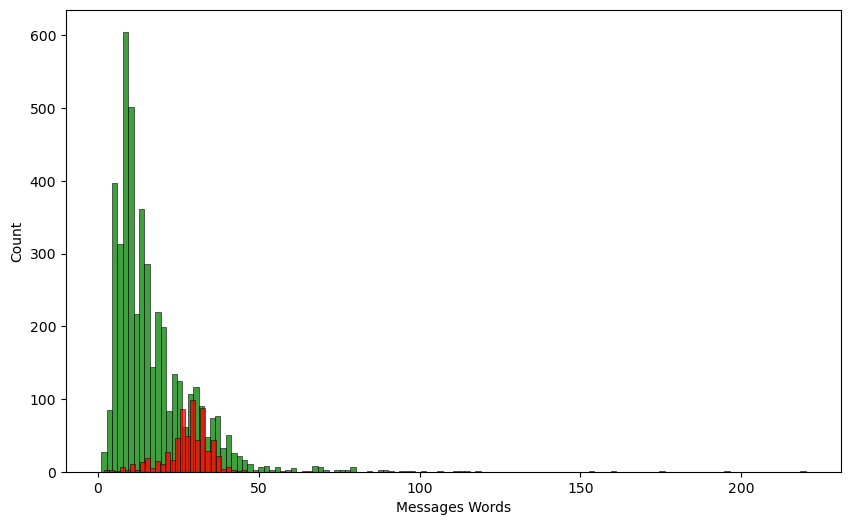

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(Spam_Identifier_DF[Spam_Identifier_DF["Spam/Ham"] == 0]["Messages Words"], color = "green" )
sns.histplot(Spam_Identifier_DF[Spam_Identifier_DF["Spam/Ham"] == 1]["Messages Words"] ,color = "red")

In [18]:
Spam_Identifier_DF.corr(numeric_only=True)


,Spam/Ham,Character_Count,Messages Words,Messages Sentences
Spam/Ham,1.000000,0.384717,0.262912,0.263939
Character_Count,0.384717,1.000000,0.965760,0.624139
Messages Words,0.262912,0.965760,1.000000,0.679971
Messages Sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

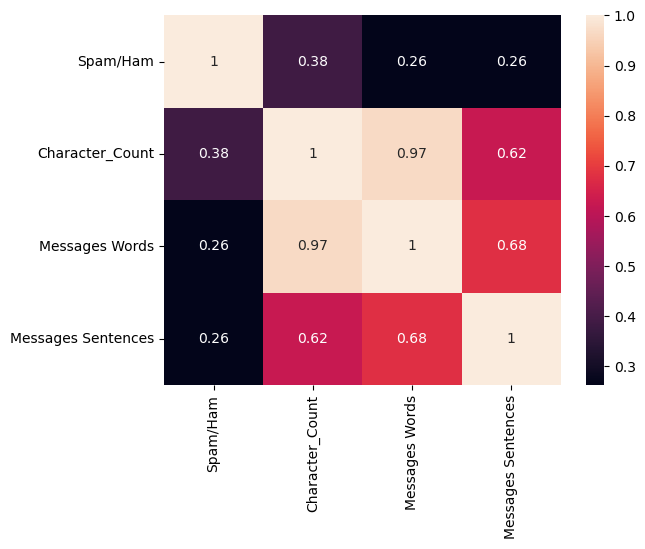

In [19]:
sns.heatmap(Spam_Identifier_DF.corr(numeric_only=True), annot = True)

# Data Preprocessing
    ->lower case
    ->Tokenization
    ->Removing special characters
    ->removing stop words and punctuation
    ->stemming 

In [20]:
 def Transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    list = []
    for i in text:
        if i.isalnum():
            list.append(i)

    text = list[:]
    list.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            list.append(i)

    text = list[:]
    list.clear()

    for i in text:
        list.append(obj.stem(i))

    return " ".join(list)

In [21]:

import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
#Transform('Hi, Eniyan. why are you running!!!')

In [24]:
from nltk.stem.porter import PorterStemmer
obj = PorterStemmer()
#obj.stem("run3424ing")

In [25]:
#Creating a new column to store transformed Messages
Spam_Identifier_DF["Transformed_Messages"] = Spam_Identifier_DF["Messages"].apply(Transform)

In [26]:
Spam_Identifier_DF

,Spam/Ham,Messages,Character_Count,Messages Words,Messages Sentences,Transformed_Messages
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [27]:
#Create a WordCloud
from wordcloud import WordCloud
wc_obj = WordCloud(width = 600, height = 500 , min_font_size = 10 ,background_color = "white")

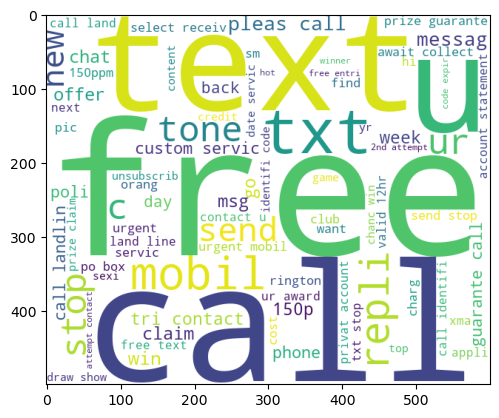

In [28]:
spam_wc = wc_obj.generate(Spam_Identifier_DF[Spam_Identifier_DF["Spam/Ham"] == 1]["Transformed_Messages"].str.cat(sep =" "))
plt.imshow(spam_wc)

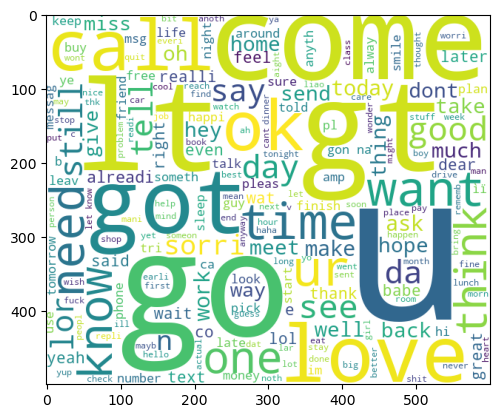

In [29]:
ham_wc = wc_obj.generate(Spam_Identifier_DF[Spam_Identifier_DF["Spam/Ham"] == 0]["Transformed_Messages"].str.cat(sep =" "))
#plt.figure(figsize = (10,8))
plt.imshow(ham_wc)

In [30]:
l = Spam_Identifier_DF[Spam_Identifier_DF["Spam/Ham"] == 1]["Transformed_Messages"].to_list()

In [31]:
new_list=[]
for x in l:
    for words in x.split(" "):
        new_list.append(words)
new_list

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [32]:
from collections import Counter
#Counter(new_list)
DF = pd.DataFrame(Counter(new_list).most_common(30))
DF

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


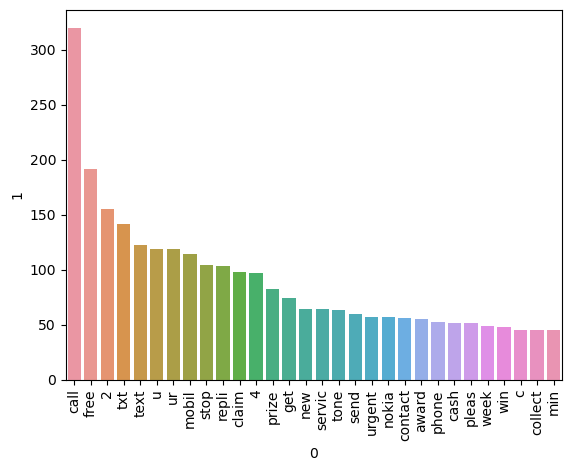

In [33]:
sns.barplot(x = DF[0], y = DF[1])
plt.xticks(rotation = "vertical")
plt.show()

In [34]:
l1 = Spam_Identifier_DF[Spam_Identifier_DF["Spam/Ham"] == 0]["Transformed_Messages"].to_list()
new_list1=[]
for x in l1:
    for words in x.split(" "):
        new_list1.append(words)

In [35]:
DF1 = pd.DataFrame(Counter(new_list1).most_common(30))
DF1

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


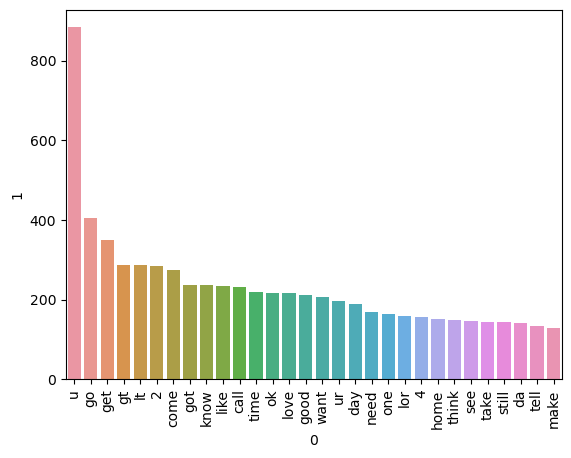

In [36]:
sns.barplot(x = DF1[0], y = DF1[1])
plt.xticks(rotation = "vertical")
plt.show()

# Model Building
   #need to convert transformed mesages to numbers to build a model.. target is already numerical as 0 and 1

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
C_obj = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)
#Spam_Identifier_DF

In [65]:
c = tfidf.fit_transform(Spam_Identifier_DF["Transformed_Messages"]).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
y = Spam_Identifier_DF["Spam/Ham"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=2)


In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy_Score=",accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print("precision_score=",precision_score(y_test,y_pred2))

Accuracy_Score= 0.9709864603481625
[[896   0]
 [ 30 108]]
precision_score= 1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [73]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [5]:
import notebook
notebook.__version__


'6.5.4'